In [25]:
#Inport
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Datos iniclaes
x = [20.0,23.0,21.0,25.0,21.0,32.0,23.0] 
y = [117.0,108.0,106.0,120.0,125.0,130.0,141.0] 
z = [4.7,3.0,2.5,3.5,2.8,4.2,5.0] 
df = pd.DataFrame({"Edad": x, "Creditos": y, "Promedio": z})

print(df)

   Edad  Creditos  Promedio
0  20.0     117.0       4.7
1  23.0     108.0       3.0
2  21.0     106.0       2.5
3  25.0     120.0       3.5
4  21.0     125.0       2.8
5  32.0     130.0       4.2
6  23.0     141.0       5.0


In [26]:
#Paso 1. Normalizar
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x', 'y', 'z'])

print(scaled_df)

          x         y     z
0  0.000000  0.314286  0.88
1  0.250000  0.057143  0.20
2  0.083333  0.000000  0.00
3  0.416667  0.400000  0.40
4  0.083333  0.542857  0.12
5  1.000000  0.685714  0.68
6  0.250000  1.000000  1.00


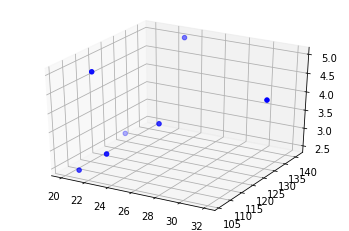

In [27]:
#Grafica puntos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

for row in x:
    asignar.append(colores[0])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()


In [28]:
#Paso 2. centroides iniales
import random

#cx = [random.uniform(0,1), random.uniform(0,1)]
#cy = [random.uniform(0,1), random.uniform(0,1)]
#cz = [random.uniform(0,1), random.uniform(0,1)]

cx = [0.5, 0.2]
cy = [0.2, 0.4]
cz = [0.3, 0.5]

print(pd.DataFrame({"X": cx, "Y": cy, "Z": cz}))


     X    Y    Z
0  0.5  0.2  0.3
1  0.2  0.4  0.5


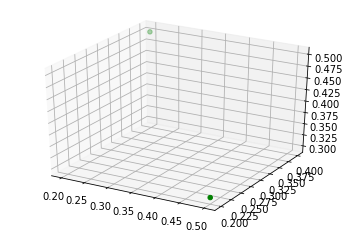

In [29]:
#Grafica de centroides
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


ax1.scatter(cx, cy, cz, c="g", marker='o')

plt.show()

In [30]:
#Paso 3. Distancia inicial Iteración
import math

#Funcion calcular distancia
def calcular_distancia(x_inicial, y_inicial, z_inicial, x_final, y_final, z_final):
    raiz = math.sqrt((x_final-x_inicial)**2+(y_final-y_inicial)**2+(z_final-z_inicial)**2)
    return raiz 
    
distC1 = [0,0,0,0,0,0,0]
distC2 = [0,0,0,0,0,0,0]
cluster = [0,0,0,0,0,0,0]

for i in range(0, len(scaled_df['x'])):
    distC1[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[0], cy[0], cz[0])
    distC2[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[1], cy[1], cz[1])
    if distC1[i] < distC2[i]:
        cluster[i] = 0
    else:
        cluster[i] = 1

print(pd.DataFrame({"K1": distC1, "K2": distC2, "Cluster": cluster}))

         K1        K2  Cluster
0  0.774249  0.437889        1
1  0.304808  0.458313        0
2  0.551009  0.650854        0
3  0.238630  0.238630        1
4  0.568825  0.422397        1
5  0.793926  0.868351        0
6  1.092016  0.782624        1


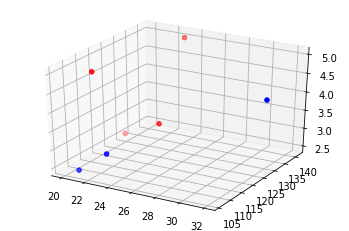

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

for row in cluster:
    asignar.append(colores[row])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()


ITERACIÓN  1
**Centroides**
          X         Y         Z
0  0.444444  0.247619  0.293333
1  0.187500  0.564286  0.600000
         K1        K2  Cluster  Cluster anterior
0  0.739022  0.419591        1                 1
1  0.287752  0.648922        0                 0
2  0.527030  0.830222        0                 0
3  0.188067  0.345698        0                 1
4  0.497605  0.491640        1                 1
5  0.806276  0.825410        0                 0
6  1.050364  0.594772        1                 1


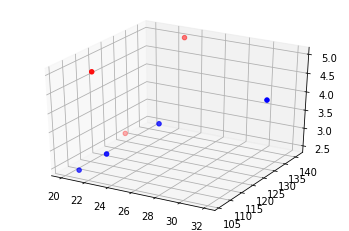

ITERACIÓN  2
**Centroides**
          X         Y         Z
0  0.437500  0.285714  0.320000
1  0.111111  0.619048  0.666667
         K1        K2  Cluster  Cluster anterior
0  0.711212  0.388248        1                 1
1  0.319063  0.743508        0                 0
2  0.556297  0.910185        0                 0
3  0.141051  0.460931        0                 0
4  0.481203  0.552649        0                 1
5  0.778464  0.891485        0                 0
6  1.003873  0.524906        1                 1


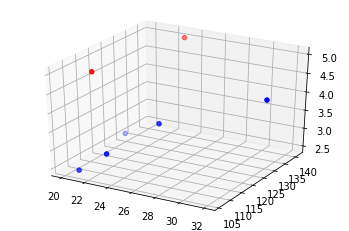

ITERACIÓN  3
**Centroides**
          X         Y     Z
0  0.366667  0.337143  0.28
1  0.125000  0.657143  0.94
         K1        K2  Cluster  Cluster anterior
0  0.703539  0.369832        1                 1
1  0.313705  0.960846        0                 0
2  0.521865  1.147682        0                 0
3  0.144399  0.665426        0                 0
4  0.384963  0.828974        0                 0
5  0.826204  0.913259        0                 0
6  0.985592  0.369832        1                 1


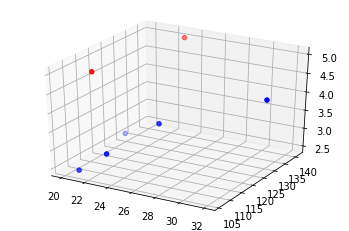

In [32]:
# N iteraciones

def calcular_promedio(scaled_df, cluster, cluster_id):
    sumax = 0.0
    sumay = 0.0
    sumaz = 0.0
    promx = 0.0
    promy = 0.0
    promz = 0.0
    cant = 0
    for i in range(0, len(scaled_df['x'])):
        if(cluster[i]==cluster_id):
            cant = cant+1
            sumax = sumax + scaled_df['x'][i]
            sumay = sumay + scaled_df['y'][i]
            sumaz = sumaz + scaled_df['z'][i]
            
    promx = sumax/cant;
    promy = sumay/cant;
    promz = sumaz/cant;
    
    return promx, promy, promz

ciclo = 1
iteracion = 0;
clusterN = [0,0,0,0,0,0,0]

while ciclo == 1:
    iteracion = iteracion +1
    print("ITERACIÓN ", iteracion)
    print("**Centroides**")
    k1x, k1y, k1z = calcular_promedio(scaled_df, cluster, 0)
    k2x, k2y, k2z = calcular_promedio(scaled_df, cluster, 1)
    
    cx = [k1x, k2x]
    cy = [k1y, k2y]
    cz = [k1z, k2z]
    
    print(pd.DataFrame({"X": cx, "Y": cy, "Z": cz}))  
    
    for i in range(0, len(scaled_df['x'])):
        distC1[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[0], cy[0], cz[0])
        distC2[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[1], cy[1], cz[1])
        if distC1[i] < distC2[i]:
            clusterN[i] = 0
        else:
            clusterN[i] = 1
        
    print(pd.DataFrame({"K1": distC1, "K2": distC2, "Cluster": clusterN, "Cluster anterior": cluster}))
    
    diferentes = 0
    for i in range(0, len(clusterN)):
        if(cluster[i]!=clusterN[i]):
            diferentes = 1
            break
    if(diferentes == 0):
        ciclo = 0
    else:
        ciclo = 1
        for i in range(0, len(clusterN)):
            cluster[i] = clusterN[i]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')

    colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
    asignar=[]

    for row in cluster:
        asignar.append(colores[row])

    ax1.scatter(x, y, z, c=asignar, marker='o')

    plt.show()
            